In [6]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [7]:
crime = pd.read_csv("C:/Users/sansk/OneDrive/Desktop/assignment dataset/crime_data.csv")
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [8]:
crime_mod = crime.rename({"Unnamed: 0":"Country"},axis=1)
crime_mod

,Country,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [9]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
crime.dtypes

Unnamed: 0     object
Murder        float64
Assault         int64
UrbanPop        int64
Rape          float64
dtype: object

# Hierarchical Clustering

In [11]:
#Normalization function

def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [12]:
crime_norm = norm_func(crime_mod.iloc[:,1:])

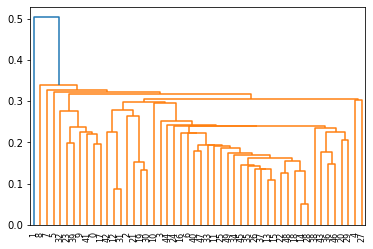

In [13]:
# create dendrogram

dendrogram = sch.dendrogram(sch.linkage(crime_norm, method='single'))

In [14]:
hc = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'single')
hc

AgglomerativeClustering(linkage='single', n_clusters=5)

In [15]:
y_hc = hc.fit_predict(crime_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,0
1,3
2,0
3,0
4,0
5,4
6,0
7,1
8,2
9,0


# K-Means 

In [16]:
kmeans = KMeans(n_clusters=6,random_state=0)
kmeans.fit(crime_norm)

KMeans(n_clusters=6, random_state=0)

In [17]:
kmeans.inertia_

2.8520398885211113

In [18]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score 

wcss = [] 
sil_score = []  
cal_haz_score = [] 

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(crime_norm)
    wcss.append(kmeans.inertia_)
    if i==1:
        continue 
    sil_score.append(silhouette_score(crime_norm, kmeans.labels_))
    cal_haz_score.append(calinski_harabasz_score(crime_norm, kmeans.labels_))

C:\Users\sansk\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [19]:
wcss

[13.184122550256445,
 6.596893867946198,
 5.010878493006418,
 3.6834561535859143,
 3.2250722560447898,
 2.8520398885211113,
 2.584866411431045,
 2.314201689711637,
 2.1259292651810116,
 1.8528270051870224]

In [20]:
sil_score

[0.42364457559625074,
 0.3187755079997931,
 0.3408903560074363,
 0.3062742525752849,
 0.2703558739205173,
 0.23711197479268148,
 0.2442234536910424,
 0.23181794623773672,
 0.2619627739735733]

In [21]:
cal_haz_score

[47.929674643883594,
 38.330850690841054,
 39.548966697249526,
 34.74009476838373,
 31.879753081019327,
 29.386948325707873,
 28.182299517461505,
 26.658102653846377,
 27.180796368281808]

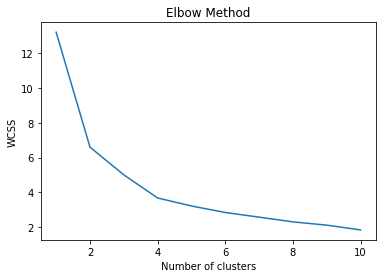

In [22]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [23]:
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=40)
clusters_new.fit(crime_norm)

KMeans(n_clusters=4, random_state=40)

In [24]:
clusters_new.labels_

array([2, 0, 0, 2, 0, 0, 3, 3, 0, 2, 3, 1, 0, 3, 1, 3, 1, 2, 1, 0, 3, 0,
       1, 2, 3, 1, 1, 0, 1, 3, 0, 0, 2, 1, 3, 3, 3, 3, 3, 2, 1, 2, 0, 3,
       1, 3, 3, 1, 1, 3])

In [25]:
crime_mod['clusterid_new'] = clusters_new.labels_
crime_mod['clusterid_new']

0     2
1     0
2     0
3     2
4     0
5     0
6     3
7     3
8     0
9     2
10    3
11    1
12    0
13    3
14    1
15    3
16    1
17    2
18    1
19    0
20    3
21    0
22    1
23    2
24    3
25    1
26    1
27    0
28    1
29    3
30    0
31    0
32    2
33    1
34    3
35    3
36    3
37    3
38    3
39    2
40    1
41    2
42    0
43    3
44    1
45    3
46    3
47    1
48    1
49    3
Name: clusterid_new, dtype: int32

In [26]:
clusters_new.cluster_centers_

array([[0.6124498 , 0.75      , 0.75423729, 0.67980189],
       [0.1686747 , 0.11485774, 0.34028683, 0.12601868],
       [0.79141566, 0.6802226 , 0.36864407, 0.36466408],
       [0.30439405, 0.32937147, 0.70588235, 0.31098951]])

In [27]:
crime_mod.groupby('clusterid_new').agg(['mean']).reset_index()

C:\Users\sansk\AppData\Local\Temp\ipykernel_15980\3135237021.py:1: FutureWarning: ['Country'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime_mod.groupby('clusterid_new').agg(['mean']).reset_index()


,clusterid_new,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,10.966667,264.000000,76.500000,33.608333
1,1,3.600000,78.538462,52.076923,12.176923
2,2,13.937500,243.625000,53.750000,21.412500
3,3,5.852941,141.176471,73.647059,19.335294


In [28]:
crime_mod

,Country,Murder,Assault,UrbanPop,Rape,clusterid_new
0,Alabama,13.2,236,58,21.2,2
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,2
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,3
7,Delaware,5.9,238,72,15.8,3
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,2


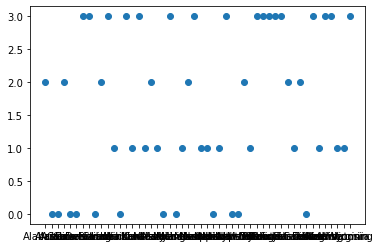

In [29]:
plt.scatter(crime_mod.Country,crime_mod.clusterid_new) 

# DBSCAN

In [30]:
dbscan = DBSCAN(eps=0.33, min_samples=7)
dbscan.fit(crime_norm)

DBSCAN(eps=0.33, min_samples=7)

In [31]:
dbscan.labels_

array([-1, -1,  0,  1,  0,  0,  1,  1, -1, -1,  1,  1,  0,  1,  1,  1,  1,
       -1,  1,  0,  1,  0,  1, -1,  1,  1,  1,  0,  1,  1,  0,  0, -1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [32]:
crime_DB=pd.DataFrame(dbscan.labels_,columns=['cluster'])

In [33]:
crime_DB

,cluster
0,-1
1,-1
2,0
3,1
4,0
5,0
6,1
7,1
8,-1
9,-1


In [34]:
crime_mod["cluster"]= dbscan.labels_

In [35]:
crime_mod

,Country,Murder,Assault,UrbanPop,Rape,clusterid_new,cluster
0,Alabama,13.2,236,58,21.2,2,-1
1,Alaska,10.0,263,48,44.5,0,-1
2,Arizona,8.1,294,80,31.0,0,0
3,Arkansas,8.8,190,50,19.5,2,1
4,California,9.0,276,91,40.6,0,0
5,Colorado,7.9,204,78,38.7,0,0
6,Connecticut,3.3,110,77,11.1,3,1
7,Delaware,5.9,238,72,15.8,3,1
8,Florida,15.4,335,80,31.9,0,-1
9,Georgia,17.4,211,60,25.8,2,-1


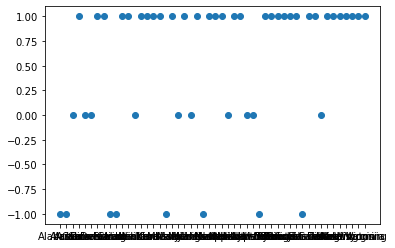

In [36]:
plt.scatter(crime_mod.Country, crime_mod.cluster)